In [1]:
import numpy as np
import pandas as pd

In [2]:
# np.genfromtxt() in action!
data = np.genfromtxt('data.txt', dtype=int, delimiter=',')
data

array([[1000025,       5,       1, ...,       1,       1,       2],
       [1002945,       5,       4, ...,       2,       1,       2],
       [1015425,       3,       1, ...,       1,       1,       2],
       ...,
       [ 888820,       5,      10, ...,      10,       2,       4],
       [ 897471,       4,       8, ...,       6,       1,       4],
       [ 897471,       4,       8, ...,       4,       1,       4]])

In [3]:
#  Attribute                     Domain
#  -- -----------------------------------------
#  1. Sample code number            id number
#  2. Clump Thickness               1 - 10
#  3. Uniformity of Cell Size       1 - 10
#  4. Uniformity of Cell Shape      1 - 10
#  5. Marginal Adhesion             1 - 10
#  6. Single Epithelial Cell Size   1 - 10
#  7. Bare Nuclei                   1 - 10
#  8. Bland Chromatin               1 - 10
#  9. Normal Nucleoli               1 - 10
# 10. Mitoses                       1 - 10
# 11. Class:                        (2 for benign, 4 for malignant)
df = pd.DataFrame(data, columns=[np.arange(1,12)])
df.head()

,1,2,3,4,5,6,7,8,9,10,11
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df[1].tail()

,1
694,776715
695,841769
696,888820
697,897471
698,897471


In [5]:
# Another way to extract the data using pd.read_csv() -> the first row is the columns
pd.read_csv('data.txt').head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [6]:
# The first column is 'id' column somewhat useless -> drop it
del df[1] # use for drop COLUMNS
# OR df.drop([1], 1, inplace=True) -> COLUMN also
#-----------------!------------------
# df.drop([1], inplace=True) to drop ROWS
df.head()

,2,3,4,5,6,7,8,9,10,11
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
# -99999 means OUTLIER -> not take into account
df.replace('?', -99999, inplace=True)

In [8]:
# take the Class (11)
y = np.array(df[11])
y
# y = df[11].values returns the SAME thing

array([[2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [4],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [4],
       [4],
       [4],
       [4],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [2],
       [4],
       [4],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [9]:
# x is array of feature (drop the Class column)
x = np.array(df.drop([11],1))
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [10]:
from sklearn import preprocessing, cross_validation, neighbors
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)


/home/default/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
x_train

array([[ 5, 10, 10, ...,  8,  5,  1],
       [ 5,  1,  1, ...,  3,  1,  1],
       [ 3,  1,  1, ...,  1,  1,  1],
       ...,
       [ 4,  5,  5, ...,  7,  5,  8],
       [ 5,  7, 10, ..., 10, 10,  1],
       [ 5,  1,  2, ...,  1,  1,  1]])

In [12]:
x_test

array([[ 4,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  2,  1,  1],
       [ 9,  5,  8, ...,  2,  1,  5],
       ...,
       [ 1,  1,  1, ...,  3,  1,  1],
       [ 1,  1,  1, ...,  3,  1,  1],
       [10, 10, 10, ...,  8,  9,  1]])

In [13]:
y_train

array([[4],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [4],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [4],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [4],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [4],
       [4],
       [2],
    

In [14]:
y_test

array([[2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [4],
       [4],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [4],
       [4],
       [2],
       [4],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [4],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [15]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
accuracy

/home/default/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9785714285714285

In [16]:
# We have 2 samples
example = np.array([[5,2,6,3,4,9,3,2,1],[5,2,2,3,3,3,3,2,1]])
example = example.reshape(2,-1)
example

array([[5, 2, 6, 3, 4, 9, 3, 2, 1],
       [5, 2, 2, 3, 3, 3, 3, 2, 1]])

In [17]:
# ? return the SAME values ?
np.array([[5,2,6,3,4,9,3,2,1],[5,2,2,3,3,3,3,2,1]])

array([[5, 2, 6, 3, 4, 9, 3, 2, 1],
       [5, 2, 2, 3, 3, 3, 3, 2, 1]])

In [18]:
# clf.predict([[sample1],[sample2],...]) expects MULTIPLE lists
prediction = clf.predict(example)
prediction

array([4, 2])

# KNN function

In [19]:
# 'Euclidean Distance' means the distance between 2 points
# In 2 dimension:
p1 = [1,3]
p2 = [2,5]
euclidean_distance = np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
print(euclidean_distance)

2.23606797749979


In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
style.use('fivethirtyeight')

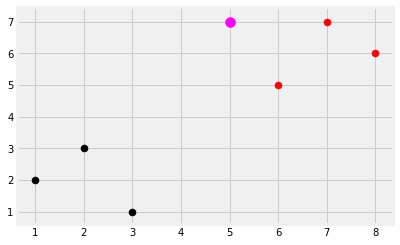

In [21]:
# Writing our own KNN:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

new = [5,7] # where does 'new' belongs to?

# for-loop in []
[[plt.scatter(ii[0],ii[1], s=50, c=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new[0],new[1], s=100, c ='magenta')
# We can see own 'new' -> 'r'

# Code Color
# b blue
# g green
# r red
# c cyan
# m magenta
# y yellow
# k black
# w white

In [22]:
len(dataset)

2

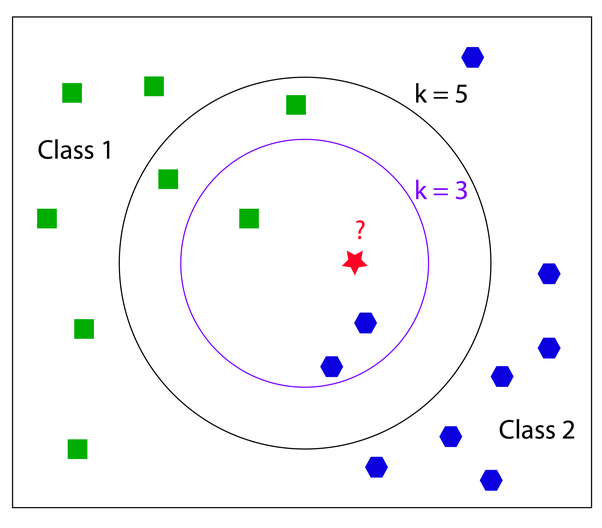

In [32]:
from PIL import Image
Image.open('knn.png')

# sau đây là một vài câu lệnh chúng ta sẽ dùng để xây dựng function này -> demo

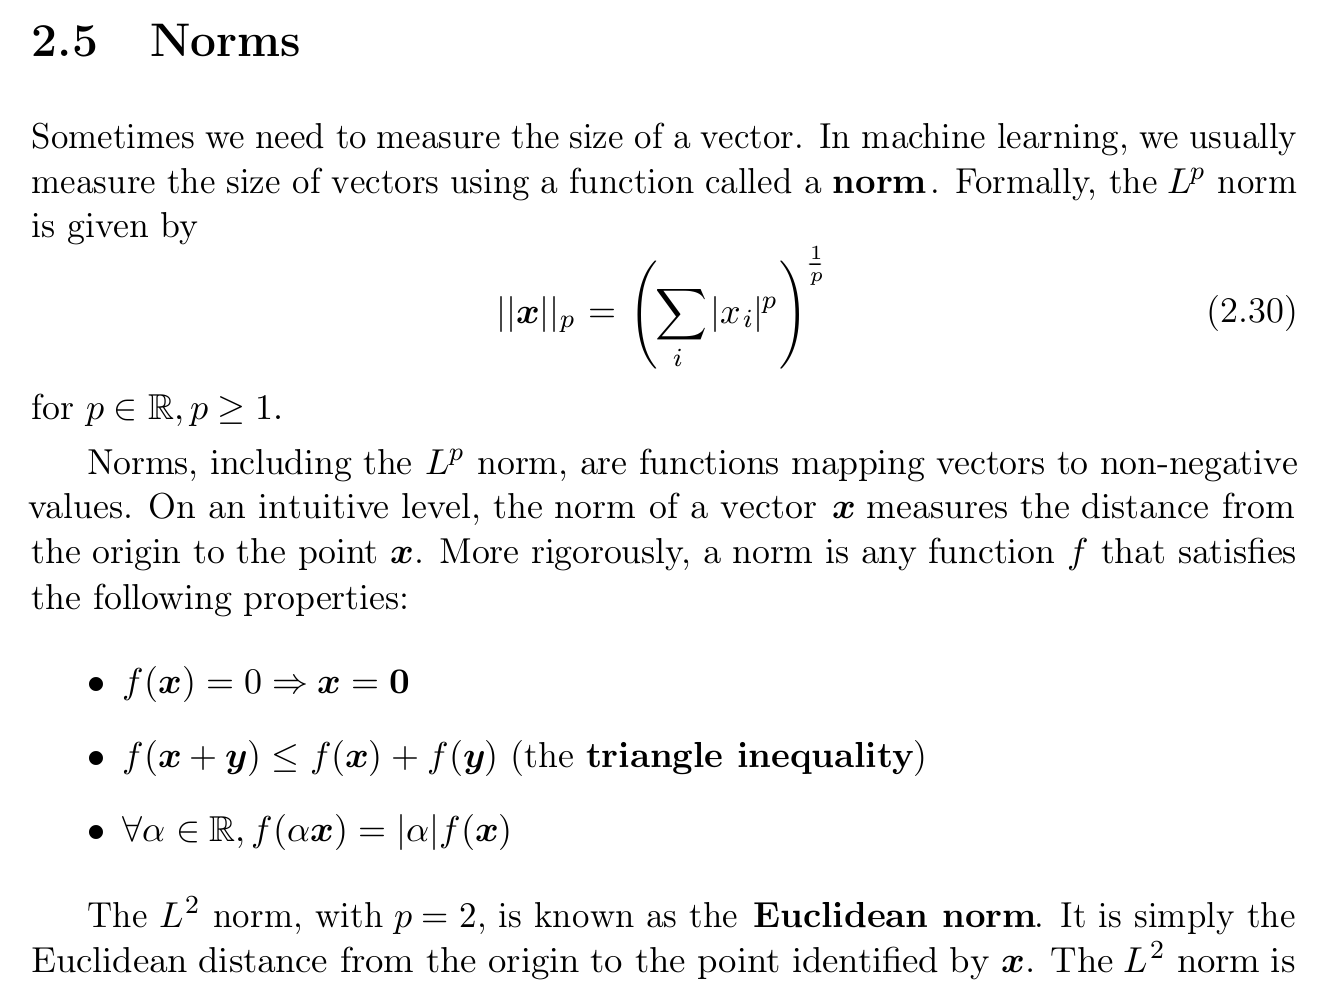

In [33]:
Image.open('norm.png')

In [23]:
def KNN(data, predict, k=3): # default value of k=3
    if len(data) >= k:
        warnings.warn('K is less than total voting group!" idiot')
        
    #knnalgos
    distances = []
    
    for group in data:
        for features in data[group]:
            # distance formular
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    # 'votes' is array of k 'labels'
    votes = [i[1] for i in sorted(distances)[:k]]
    # print(Counter(votes).most_common(1)) -> ['group', '#votes']
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

In [25]:
KNN(dataset, new, k=3)

'r'

# KNN w/ breast cancer dataset

In [26]:
#  Attribute                     Domain
#  -- -----------------------------------------
#  1. Sample code number            id number
#  2. Clump Thickness               1 - 10
#  3. Uniformity of Cell Size       1 - 10
#  4. Uniformity of Cell Shape      1 - 10
#  5. Marginal Adhesion             1 - 10
#  6. Single Epithelial Cell Size   1 - 10
#  7. Bare Nuclei                   1 - 10
#  8. Bland Chromatin               1 - 10
#  9. Normal Nucleoli               1 - 10
# 10. Mitoses                       1 - 10
# 11. Class:                        (2 for benign, 4 for malignant)
df.head()

,2,3,4,5,6,7,8,9,10,11
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [27]:
list_data = df.astype(float).values.tolist()
list_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [28]:
import random
random.shuffle(list_data)

In [29]:
test_size = .2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

# Divide list_data into train_data & test_data
train_data = list_data[:-int(test_size*len(list_data))]
test_data = list_data[-int(test_size*len(list_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [30]:
test_set

{2: [[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 6.0, 1.0],
  [1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0],
  [1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.

In [31]:
correct = 0
total = 0

# our model KNN(train_set, predict, k=...)
for group in test_set:
    for data in test_set[group]:
        vote = KNN(train_set, data, k=5)
        if vote == group:
            correct += 1
            
        total += 1
        
print("Accuracy : ", correct/total)

Accuracy :  0.9712230215827338
